In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [111]:
rawdf = pd.read_csv("csv_result-Autism-Child-Data.csv") # This dataset is for child
rawdf.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,4-11 years,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,4-11 years,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,4-11 years,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,4-11 years,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,4-11 years,?,NO


### Data cleaning

In [112]:
df = rawdf[["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","age","gender","jundice","result","austim"]]
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,austim
0,1,1,1,1,0,0,1,1,0,0,5,f,no,6,no
1,1,1,0,1,0,0,0,1,0,1,5,m,no,5,yes
2,1,1,0,1,1,0,1,1,1,1,5,m,yes,8,yes
3,1,1,0,1,0,0,1,1,0,1,7,f,no,6,yes
4,1,0,0,0,0,0,0,1,0,0,7,f,no,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,5,f,no,7,no
700,1,0,0,0,0,0,0,1,0,1,7,m,no,3,no
701,1,0,1,1,1,0,1,1,0,1,5,f,no,7,no
702,1,0,0,1,1,0,1,0,1,1,7,m,no,6,no


In [113]:
index = []
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        temp = df.iloc[i,j]
        if temp == "?":
            index.append(i)
            break
adf = df.drop(index)
adf[['age']] = adf[['age']].apply(pd.to_numeric)
adf.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,austim
0,1,1,1,1,0,0,1,1,0,0,5,f,no,6,no
1,1,1,0,1,0,0,0,1,0,1,5,m,no,5,yes
2,1,1,0,1,1,0,1,1,1,1,5,m,yes,8,yes
3,1,1,0,1,0,0,1,1,0,1,7,f,no,6,yes
4,1,0,0,0,0,0,0,1,0,0,7,f,no,2,no


In [114]:
features_raw = adf[["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","age","gender","jundice","result"]]

features_final = pd.get_dummies(features_raw)
response_final = adf[["austim"]]
features_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_f,gender_m,jundice_no,jundice_yes
0,1,1,1,1,0,0,1,1,0,0,5,6,1,0,1,0
1,1,1,0,1,0,0,0,1,0,1,5,5,0,1,1,0
2,1,1,0,1,1,0,1,1,1,1,5,8,0,1,0,1
3,1,1,0,1,0,0,1,1,0,1,7,6,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,7,2,1,0,1,0


In [115]:
# Split the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_final, response_final, test_size=0.3, random_state=3)

## 1. Random Forest

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# train-test split
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_result = cross_val_score(rf, features_final, response_final, cv=10)
print(cv_result.mean())  # cv error

rf.fit(x_train,y_train)

rf_pred = [x for x in rf.predict(x_test)]

accuracy = metrics.accuracy_score(rf_pred,y_test)
accuracy

0.8447082494969818


0.8436018957345972

## 2. SVM

In [117]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, gamma=2)
cv_result = cross_val_score(svc, features_final, response_final, cv=10)
print(cv_result.mean())

svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
accuracy = metrics.accuracy_score(svc_pred,y_test)
accuracy

0.8703822937625756


0.8530805687203792

## 3. KNN

In [118]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_result = cross_val_score(knn, features_final, response_final, cv=10)
print(cv_result.mean())

knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(knn_pred,y_test)
accuracy


0.8632595573440642


0.8483412322274881

In [119]:
for i in range(5,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_result = cross_val_score(knn, features_final, response_final, cv=10)
    print("K={}: {}".format(i,cv_result.mean()))

K=5: 0.8461971830985915
K=6: 0.8661167002012071
K=7: 0.85897384305835
K=8: 0.8646881287726357
K=9: 0.85897384305835
K=10: 0.8632595573440642
K=11: 0.8604225352112677
K=12: 0.8632595573440645
K=13: 0.8590140845070424
K=14: 0.8675452716297787
K=15: 0.8646881287726359
K=16: 0.8689537223340041
K=17: 0.8689537223340041
K=18: 0.8703822937625756
K=19: 0.8703822937625756


## 4. Naive Bayes

In [120]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
cv_result = cross_val_score(nb, features_final, response_final, cv=10)
print(cv_result.mean())

nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
accuracy = metrics.accuracy_score(nb_pred,y_test)
accuracy

0.8675452716297787


0.8483412322274881

## 5. Lightgbm

In [121]:
from lightgbm import LGBMClassifier as LGBM
lgbmfit = LGBM(learning_rate=0.01,num_leaves=15)
cv_result = cross_val_score(lgbmfit, features_final, response_final, cv=10)
print(cv_result.mean())

lgbmfit.fit(x_train,y_train)
lgbmfit_pred = lgbmfit.predict(x_test)
accuracy = metrics.accuracy_score(lgbmfit_pred,y_test)
accuracy

0.8703822937625756


0.8530805687203792

## 6. HistGradientBoosting

In [122]:
from sklearn.ensemble import HistGradientBoostingClassifier as HGBC
hgbcfit = HGBC(learning_rate=0.05,max_leaf_nodes=31, l2_regularization=1)
cv_result = cross_val_score(hgbcfit, features_final, response_final, cv=10)
print(cv_result.mean())

hgbcfit.fit(x_train, y_train)
hgbcfit_pred = hgbcfit.predict(x_test)

0.8475855130784709


### Compare different models

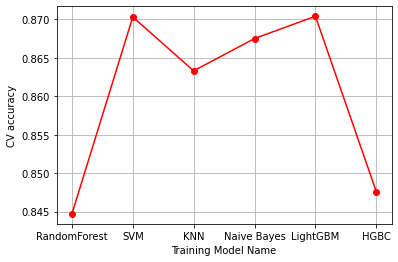

In [123]:
modelname = ['RandomForest','SVM','KNN','Naive Bayes', 'LightGBM', 'HGBC']
cv_acc = [0.8447, 0.8703, 0.8633, 0.8675, 0.8704, 0.8476]
import matplotlib.pyplot as plt

plt.plot(modelname,cv_acc,color="red",marker="o")
plt.xlabel('Training Model Name')
plt.ylabel('CV accuracy')
plt.grid()
plt.show()